# PREDICTING THE PRICE OF HOUSING FOR HASS REAL ESTATE COMPANY

#1. Defining the question


As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. 

You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. 

Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

## a) Specifying the question

Using the information given on the real estate properties that was collected over the past few weeks, What are the factors that affect housing prices?

## b) Defining the metric of success 

To be able to create a suitable model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

## c) Understanding the context

We have been provided with one dataset that provide us with values of our variables, both the dependent ('price'), and other independent /predictor variables.

The dataset has 1 response variable and 19 predictor variables. We will design and test our model using these predictor variables until we are able to come up with the optimal model.

### **Column descriptions**

Id - unique record identifier

price  - Price of the house

bedrooms - Number of Bedrooms

bathrooms - Number of Bathrooms

sqft_living - Square feet area of living area

sqft_lot  - Square feet area of parking Layout

floors - Number of Floors

waterfront - Whether waterfront is there or not

view - Number of Views

grade - Grades

sqft_above

sqft_basement - Square feet area off basement

yr_built - Year the house is built

yr_renovated - Year the house is renovated

zipcode - zipcode os the house

lat : Latitude of the house

lon : Longitude of the house

sqft_living15

sqft_lot15

## d) Recording the experimental design

i) Perform EDA

ii) Perform univariate, bivariate and multivariate analysis recording your observations

iii) Check for multicollinearity


iv) Performing regression analysis and create different models

*   Multiple Linear Regression
*   Quantile Regression
*   Ridge Regression
*   Lasso Regression
*   Elastic Net Regression

v) Create residual plots for the models and assess heteroskedasticity using Barlett's test.

vi) Recommendation based on your analysis. 




## e) Data Revelance

#2. Reading Data

#Importing Libraries

In [95]:
# importing our libraries

#pandas libraries
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

# Multiple Linear regression libraries
from sklearn import metrics
from sklearn import linear_model
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

#import category_encoders as ce

#quantile regression
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 


# Ridge regression libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import statsmodels.formula.api as smf

# Lasso regression libraries
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston


#Elastic net regression




#Loading the dataset

In [96]:
# loading the dataset

house = pd.read_csv("http://bit.ly/IndependentProjectWeek7Dataset")

In [97]:
# previewing

house.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

# Exploratory Data Analysis

In [98]:
# checking the columns
house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [99]:
# checking the shape
house.shape

#the dataset has 21613 rows and 20 columns

(21613, 20)

In [100]:
# Checking the information of the objects 
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [101]:
# getting the summary statistics of the numerical data
house.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.401822e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.673622e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [102]:
# checking for null values

house.isnull().sum()

# there are no missing values

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [103]:
# checking for duplicated values

house.duplicated().sum()

# there are 3 duplicates
# we will drop these as they are very few 

3

In [104]:
# We drop duplicates by setting the column 'id' as our subset
# This is because it uniquely identifies the rows

house.drop_duplicates(subset ="id", keep = False, inplace = True)


In [105]:
# previweing the shape of the dataframe after dropping duplicates

house.shape

(21260, 20)

In [106]:
# Checking how many records have been lost

21613-21260

# we have lost 353 records

353

In [107]:
# dropping unneccessary columns
# we drop  id, lattitude and longitude.
# the zipcode will represent location instead of the lattitude and longitude

house_df = house.drop(['id','lat', 'long'], 1)


Before we get into analysis, we have to note that Property value usually depends on the age of the property, we will then proceed to calculate property age and how recent / early the property has been renovated using the columns yr_built and yr_renovated respectively.

### Feature Engineering

#####Property age from Year Built

In [108]:
# we need to find the ages of the properties
# we will do this by finding the minimum year and subtracting it from each subsequent year 
# we will then replace "yr_built" column with a "property_age" column 

# finding the earliest year
print("Oldest property was built in : ", house_df['yr_built'].min())

print("__________________________________________")

# finding latest year built
print("Latest property was built in : ", house_df['yr_built'].max())


Oldest property was built in :  1900
__________________________________________
Latest property was built in :  2015


In [109]:
# calculating the property age

property_age =[]

earliest_year = 1900

for year in range(len(house_df)):
  property_age.append(house_df['yr_built'].iloc[year] - earliest_year)

print(property_age)



[55, 51, 33, 65, 87, 101, 95, 63, 60, 103, 65, 42, 27, 77, 0, 79, 94, 16, 21, 69, 47, 68, 95, 85, 85, 41, 15, 9, 48, 105, 103, 105, 29, 29, 81, 30, 33, 4, 69, 96, 100, 84, 114, 22, 59, 103, 66, 81, 53, 53, 55, 66, 50, 81, 27, 95, 108, 103, 68, 91, 59, 54, 73, 114, 79, 25, 89, 105, 68, 65, 73, 72, 16, 105, 65, 86, 56, 41, 56, 102, 103, 92, 48, 64, 52, 25, 61, 106, 79, 106, 88, 101, 62, 46, 67, 75, 80, 92, 10, 29, 83, 50, 54, 78, 39, 85, 91, 42, 84, 5, 80, 71, 101, 0, 110, 45, 50, 25, 64, 87, 53, 24, 90, 14, 67, 78, 26, 104, 86, 86, 89, 114, 105, 56, 68, 68, 81, 114, 25, 68, 62, 23, 61, 94, 5, 107, 60, 47, 90, 47, 54, 106, 42, 67, 96, 67, 16, 68, 62, 62, 100, 79, 75, 76, 49, 99, 79, 64, 54, 78, 55, 84, 80, 108, 86, 1, 75, 49, 88, 25, 61, 96, 93, 86, 69, 87, 1, 75, 77, 59, 59, 62, 48, 103, 20, 107, 97, 69, 43, 94, 52, 76, 62, 66, 110, 15, 41, 20, 93, 114, 83, 105, 78, 23, 57, 100, 47, 47, 99, 61, 87, 66, 94, 42, 105, 78, 61, 104, 15, 60, 78, 61, 47, 83, 76, 4, 93, 65, 68, 40, 25, 54, 18, 

In [110]:
# converting property_age into a dataframe from a list

calculated_year = pd.DataFrame(property_age, columns =['property_age'])

# append the column to the house dataframe

house_df = pd.concat([house_df, calculated_year], 1)


In [111]:
# preview the dataset
house_df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0       3.0       1.00       1180.0    5650.0     1.0         0.0   
1  538000.0       3.0       2.25       2570.0    7242.0     2.0         0.0   
2  180000.0       2.0       1.00        770.0   10000.0     1.0         0.0   
3  604000.0       4.0       3.00       1960.0    5000.0     1.0         0.0   
4  510000.0       3.0       2.00       1680.0    8080.0     1.0         0.0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0   0.0        3.0    7.0      1180.0            0.0    1955.0           0.0   
1   0.0        3.0    7.0      2170.0          400.0    1951.0        1991.0   
2   0.0        3.0    6.0       770.0            0.0    1933.0           0.0   
3   0.0        5.0    7.0      1050.0          910.0    1965.0           0.0   
4   0.0        3.0    8.0      1680.0            0.0    1987.0           0.0   

   zipcode  sqft_living15  sqft_lot15  property_age  
0  98178.0         1340.0      5650.0          55.0  
1  98125.0         1690.0      7639.0          51.0  
2  98028.0         2720.0      8062.0          33.0  
3  98136.0         1360.0      5000.0          65.0  
4  98074.0         1800.0      7503.0          87.0

##### Property renovation age from year renovated

In [112]:
# we need to find the ages of renovation of the properties
# we will do this by finding the minimum renvation year and subtracting it from each subsequent renovation year 
# we will then replace "yr_renovated" column with a "renovation_age" column 

# finding the earliest year
print("Oldest renovation was : ", house_df['yr_renovated'].min())

print("__________________________________________")

# finding latest year built
print("Latest renovation was : ", house_df['yr_renovated'].max())

Oldest renovation was :  0.0
__________________________________________
Latest renovation was :  2015.0


In [113]:
# Calculating renovation age

renovation_age =[]

latest_year = 2015

for year in range(len(house_df)):
  if latest_year - house_df['yr_renovated'].iloc[year] != 2015:
    renovation_age.append(house_df['yr_renovated'].iloc[year] - house_df['yr_built'].iloc[year])
  else:
    renovation_age.append(0)

print(renovation_age)

[0, 40.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 72.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, nan, nan, 45.0, 0, 0, 0, 0, 0, 0, 0, 60.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 99.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 78.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 97.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 74.0, 0, 0, 0, 0, 0, 0, 34.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 63.0, 0, 0, 0, 0, 0, 0, 101.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26.0, 0, 0, 0, 0, 49.0, 0, 0, 0, 0, 0, 0, 0, 89.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, nan, nan, 0, 

In [114]:
# converting into a dataframe to enable so as to merge with house_df

renov_year = pd.DataFrame(renovation_age, columns =['years_since_renovation'])



In [115]:
# append the column to the home_data dataframe

house_df = pd.concat([house_df, renov_year], 1)

In [116]:
# preview the dataset

house_df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0       3.0       1.00       1180.0    5650.0     1.0         0.0   
1  538000.0       3.0       2.25       2570.0    7242.0     2.0         0.0   
2  180000.0       2.0       1.00        770.0   10000.0     1.0         0.0   
3  604000.0       4.0       3.00       1960.0    5000.0     1.0         0.0   
4  510000.0       3.0       2.00       1680.0    8080.0     1.0         0.0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0   0.0        3.0    7.0      1180.0            0.0    1955.0           0.0   
1   0.0        3.0    7.0      2170.0          400.0    1951.0        1991.0   
2   0.0        3.0    6.0       770.0            0.0    1933.0           0.0   
3   0.0        5.0    7.0      1050.0          910.0    1965.0           0.0   
4   0.0        3.0    8.0      1680.0            0.0    1987.0           0.0   

   zipcode  sqft_living15  sqft_lot15  property_age  years_since_renovation  
0  98178.0         1340.0      5650.0          55.0                     0.0  
1  98125.0         1690.0      7639.0          51.0                    40.0  
2  98028.0         2720.0      8062.0          33.0                     0.0  
3  98136.0         1360.0      5000.0          65.0                     0.0  
4  98074.0         1800.0      7503.0          87.0                     0.0

In [117]:
# checking columns

house_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'property_age', 'years_since_renovation'],
      dtype='object')

In [118]:
# We drop the yr_built and yr_renovated columns

home = house_df.drop(['yr_built', 'yr_renovated'], 1)

#preview
home.head() # preview the dataset

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0       3.0       1.00       1180.0    5650.0     1.0         0.0   
1  538000.0       3.0       2.25       2570.0    7242.0     2.0         0.0   
2  180000.0       2.0       1.00        770.0   10000.0     1.0         0.0   
3  604000.0       4.0       3.00       1960.0    5000.0     1.0         0.0   
4  510000.0       3.0       2.00       1680.0    8080.0     1.0         0.0   

   view  condition  grade  sqft_above  sqft_basement  zipcode  sqft_living15  \
0   0.0        3.0    7.0      1180.0            0.0  98178.0         1340.0   
1   0.0        3.0    7.0      2170.0          400.0  98125.0         1690.0   
2   0.0        3.0    6.0       770.0            0.0  98028.0         2720.0   
3   0.0        5.0    7.0      1050.0          910.0  98136.0         1360.0   
4   0.0        3.0    8.0      1680.0            0.0  98074.0         1800.0   

   sqft_lot15  property_age  years_since_renovation  
0      5650.0          55.0                     0.0  
1      7639.0          51.0                    40.0  
2      8062.0          33.0                     0.0  
3      5000.0          65.0                     0.0  
4      7503.0          87.0                     0.0

In [119]:
# checking columns
home.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'property_age', 'years_since_renovation'],
      dtype='object')


## Univariate Analysis

In [120]:
# checking columns
home.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'property_age', 'years_since_renovation'],
      dtype='object')

In [121]:
# previewing the head our dataset 
home.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0       3.0       1.00       1180.0    5650.0     1.0         0.0   
1  538000.0       3.0       2.25       2570.0    7242.0     2.0         0.0   
2  180000.0       2.0       1.00        770.0   10000.0     1.0         0.0   
3  604000.0       4.0       3.00       1960.0    5000.0     1.0         0.0   
4  510000.0       3.0       2.00       1680.0    8080.0     1.0         0.0   

   view  condition  grade  sqft_above  sqft_basement  zipcode  sqft_living15  \
0   0.0        3.0    7.0      1180.0            0.0  98178.0         1340.0   
1   0.0        3.0    7.0      2170.0          400.0  98125.0         1690.0   
2   0.0        3.0    6.0       770.0            0.0  98028.0         2720.0   
3   0.0        5.0    7.0      1050.0          910.0  98136.0         1360.0   
4   0.0        3.0    8.0      1680.0            0.0  98074.0         1800.0   

   sqft_lot15  property_age  years_since_renovation  
0      5650.0          55.0                     0.0  
1      7639.0          51.0                    40.0  
2      8062.0          33.0                     0.0  
3      5000.0          65.0                     0.0  
4      7503.0          87.0                     0.0

In [122]:
# previewing the tail of our dataset
home.tail()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
21608  360000.0       3.0       2.50       1530.0    1131.0     3.0   
21609  400000.0       4.0       2.50       2310.0    5813.0     2.0   
21610  402101.0       2.0       0.75       1020.0    1350.0     2.0   
21611  400000.0       3.0       2.50       1600.0    2388.0     2.0   
21612  325000.0       2.0       0.75       1020.0    1076.0     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  zipcode  \
21608         0.0   0.0        3.0    8.0      1530.0            0.0  98103.0   
21609         0.0   0.0        3.0    8.0      2310.0            0.0  98146.0   
21610         0.0   0.0        3.0    7.0      1020.0            0.0  98144.0   
21611         0.0   0.0        3.0    8.0      1600.0            0.0  98027.0   
21612         0.0   0.0        3.0    7.0      1020.0            0.0  98144.0   

       sqft_living15  sqft_lot15  property_age  years_since_renovation  
21608         1530.0      1509.0           NaN                     0.0  
21609         1830.0      7200.0           NaN                     0.0  
21610         1020.0      2007.0           NaN                     0.0  
21611         1410.0      1287.0           NaN                     NaN  
21612         1020.0      1357.0           NaN                     NaN

In [123]:
# checking the shape
home.shape

(21613, 17)

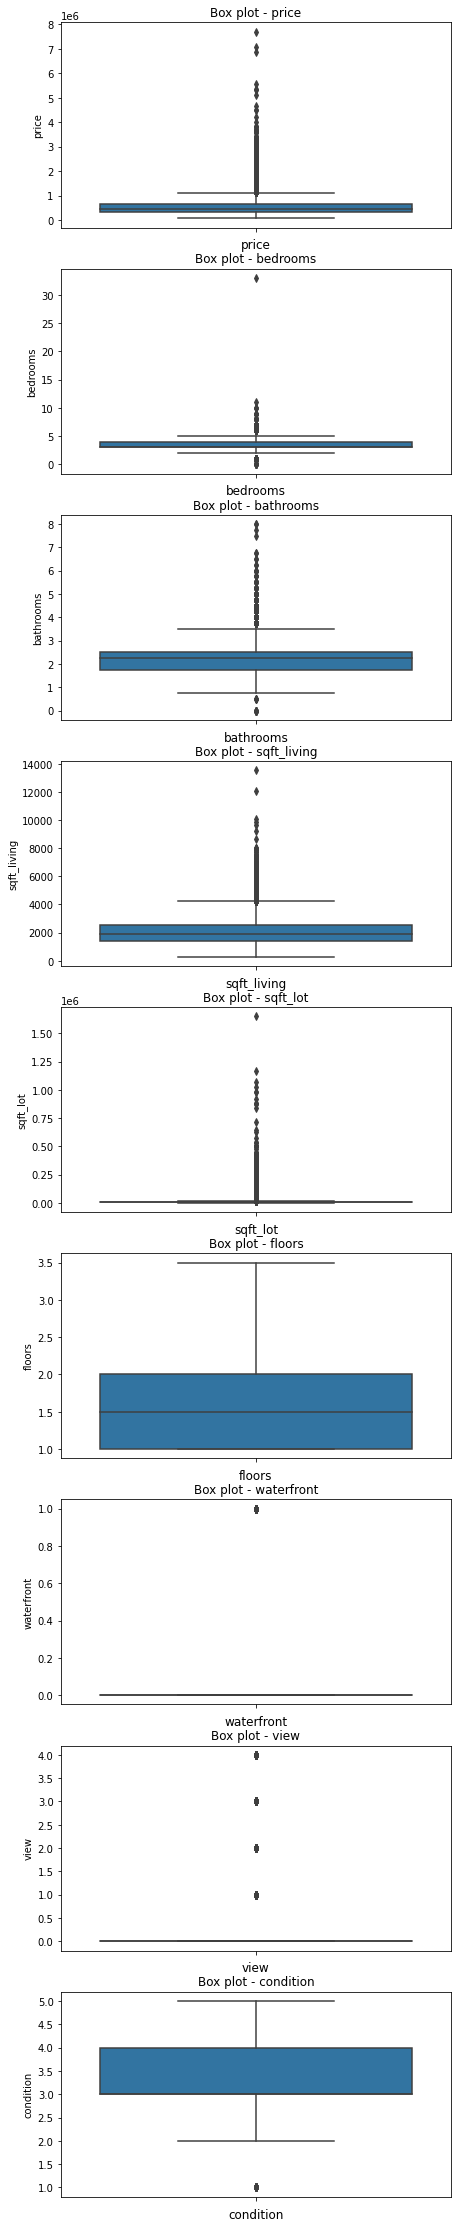

In [124]:
#Plot a box plot to check for outliers
# we will plot twice since the columns are many
# first plot with 9 columns

col_names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 
             'view', 'condition']

fig,ax = plt.subplots(len(col_names),figsize=(7,40))
for i , col_val in enumerate(col_names):
  sns.boxplot(y=home[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =12)
  ax[i].set_xlabel(col_val,fontsize=12)
plt.show()

# There are outliers in price, number of bedrooms, number of bathrooms, size of living room ('sqft_living'), sqft lot, waterfront,view and condition
# There are no outliers in 'floors'

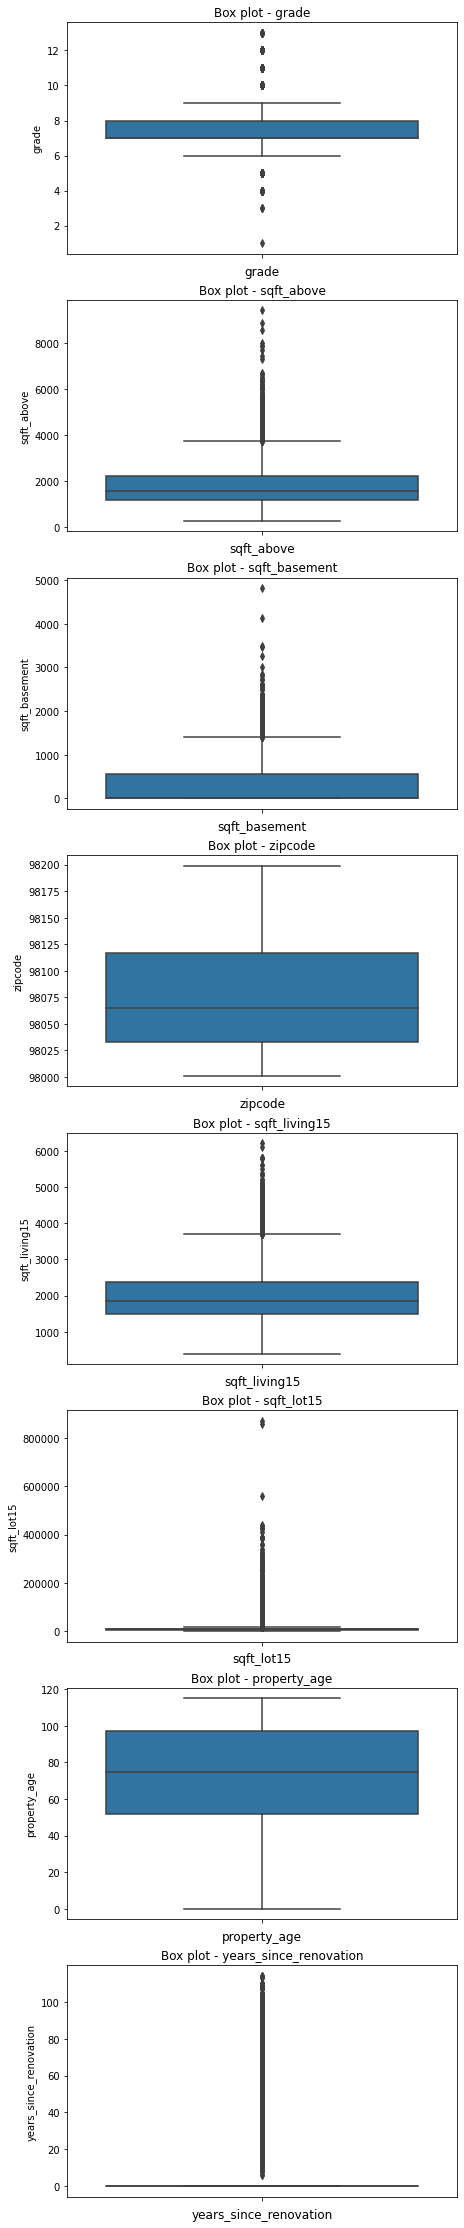

In [125]:
# second plot with the 8 remaining columns

col_names1 = ['grade', 'sqft_above','sqft_basement', 'zipcode', 'sqft_living15', 
              'sqft_lot15','property_age', 'years_since_renovation']

fig,ax = plt.subplots(len(col_names1),figsize=(7,40))
for i , col_val in enumerate(col_names1):
  sns.boxplot(y=home[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =12)
  ax[i].set_xlabel(col_val,fontsize=12)
plt.show()

# there are outliers in 'grade', 'sqft_above','sqft_basement','sqft_living15', 'sqft_lot15','property_age', 
#'years_since_renovation' has the most outliers
# there are no outliers in zip code, property age

We will not remove outliers because the difference in the values of the our variables is very important in this study.

In [126]:
home.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'property_age', 'years_since_renovation'],
      dtype='object')

###Histograms

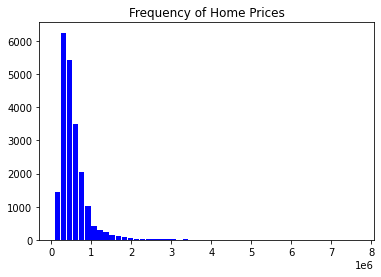

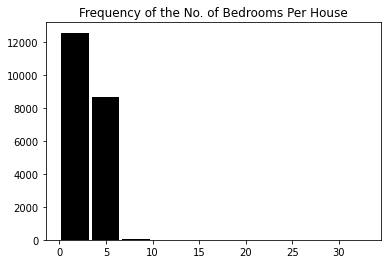

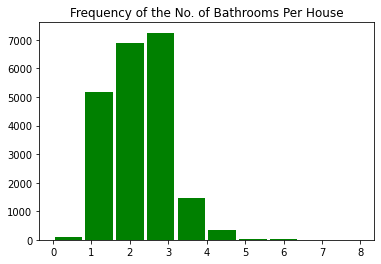

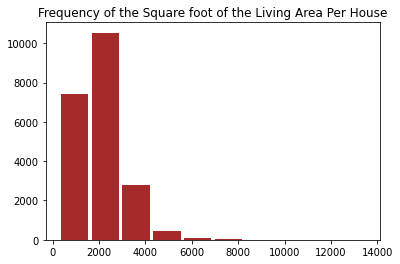

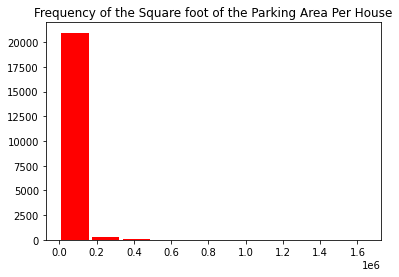

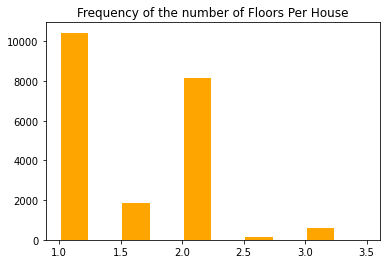

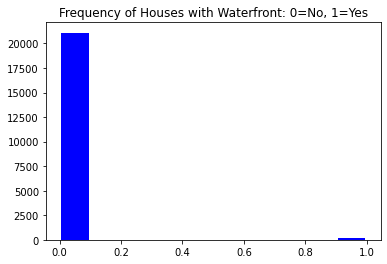

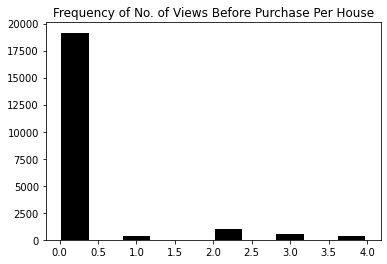

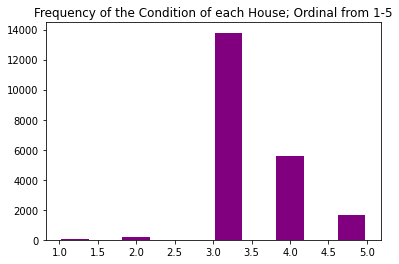

In [127]:
# We Plot histograms to see the distribution of values of the home dataset
# first set of histograms

plt.hist(home['price'], bins = 50, rwidth = 0.9, color = "blue")
plt.title('Frequency of Home Prices')
plt.show()

plt.hist(home['bedrooms'], rwidth = 0.9, color = "black")
plt.title('Frequency of the No. of Bedrooms Per House')
plt.show()

plt.hist(home['bathrooms'], rwidth = 0.9, color = "green")
plt.title('Frequency of the No. of Bathrooms Per House')
plt.show()

plt.hist(home['sqft_living'], rwidth = 0.9, color = "brown")
plt.title('Frequency of the Square foot of the Living Area Per House')
plt.show()

plt.hist(home['sqft_lot'], rwidth = 0.9, color = "red")
plt.title('Frequency of the Square foot of the Parking Area Per House')
plt.show()

plt.hist(home['floors'], rwidth = 0.9, color = "orange")
plt.title('Frequency of the number of Floors Per House')
plt.show()
 
plt.hist(home['waterfront'], rwidth = 0.9, color = "blue")
plt.title('Frequency of Houses with Waterfront: 0=No, 1=Yes')
plt.show()

plt.hist(home['view'], rwidth = 0.9, color = "black")
plt.title('Frequency of No. of Views Before Purchase Per House')
plt.show()

plt.hist(home['condition'], rwidth = 0.9, color = "purple")
plt.title('Frequency of the Condition of each House; Ordinal from 1-5')
plt.show()

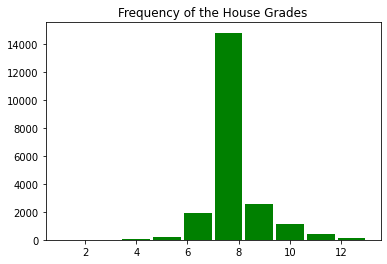

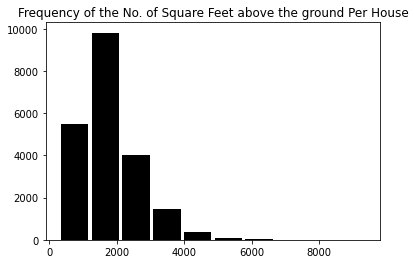

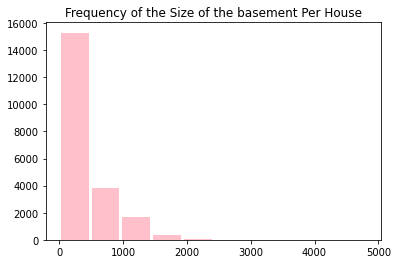

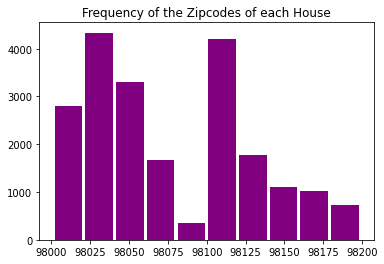

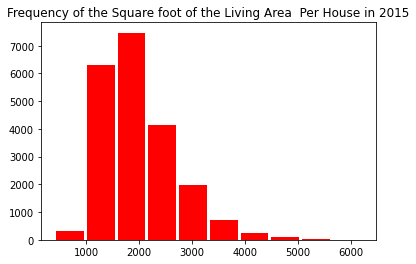

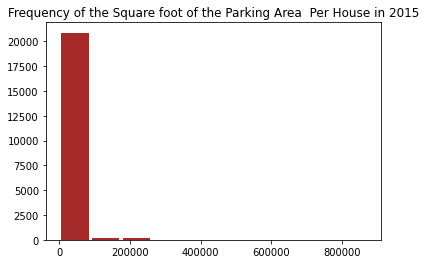

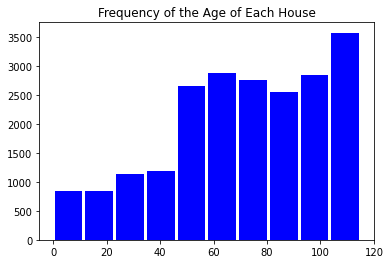

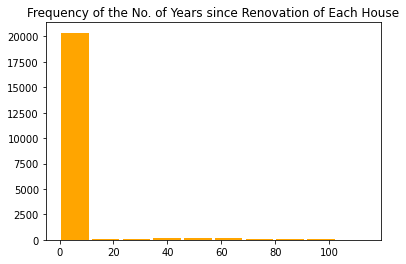

In [128]:
# second set of histograms

plt.hist(home['grade'], rwidth = 0.9, color = "green")
plt.title('Frequency of the House Grades')
plt.show()

plt.hist(home['sqft_above'], rwidth = 0.9, color = "black")
plt.title('Frequency of the No. of Square Feet above the ground Per House')
plt.show()

plt.hist(home['sqft_basement'], rwidth = 0.9, color = "pink")
plt.title('Frequency of the Size of the basement Per House')
plt.show()

plt.hist(home['zipcode'], rwidth = 0.9, color = "purple")
plt.title('Frequency of the Zipcodes of each House')
plt.show()

plt.hist(home['sqft_living15'], rwidth = 0.9, color = "red")
plt.title('Frequency of the Square foot of the Living Area  Per House in 2015')
plt.show()

plt.hist(home['sqft_lot15'], rwidth = 0.9, color = "brown")
plt.title('Frequency of the Square foot of the Parking Area  Per House in 2015')
plt.show()
 
plt.hist(home['property_age'], rwidth = 0.9, color = "blue")
plt.title('Frequency of the Age of Each House')
plt.show()

plt.hist(home['years_since_renovation'], rwidth = 0.9, color = "orange")
plt.title('Frequency of the No. of Years since Renovation of Each House')
plt.show()

Most of the variables are skewed to the left apart from:

The number of floors and zipcodes which are unbalanced.

The grades of the houses which is a normal distribution.

The condition and age of the houses which are skewed to the right.

### Measures of Central Tendency

In [129]:
home.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'property_age', 'years_since_renovation'],
      dtype='object')

#### MEAN

In [130]:
# we will check for the mean 

print('Price Mean is:', round(home["price"].mean()))
print('No. of Bedrooms Mean is:', round(home["bedrooms"].mean()))
print('No. of Bathrooms Mean is:', round(home["bathrooms"].mean()))
print('Living Room Sqft Mean is:', round(home["sqft_living"].mean()))
print('Parking Lot Sqft Mean is:', round(home["sqft_lot"].mean()))
print('No. of Floors Mean is:', round(home["floors"].mean()))
print('Availability of Waterfront Mean is:', round(home["waterfront"].mean()))
print('No. of Views Mean is:', round(home["view"].mean()))
print('House Condition Mean is:', round(home["condition"].mean()))
print('House Grade Mean is:', round(home["grade"].mean()))
print('Sqft Above Ground Mean is:', round(home["sqft_above"].mean()))
print('Basement Size in Sqft Mean is:', round(home["sqft_basement"].mean()))
print('ZipCode Mean is:', round(home["zipcode"].mean()))
print('Sqft of Living Room in 2015 Mean is:', round(home["sqft_living15"].mean()))
print('Sqft of Parking Lot in 2015 Mean is:', round(home["sqft_lot15"].mean()))
print('Property Age Mean is:', round(home["property_age"].mean()))
print('Renovation Age Mean is:', round(home["years_since_renovation"].mean()))



Price Mean is: 542183
No. of Bedrooms Mean is: 3
No. of Bathrooms Mean is: 2
Living Room Sqft Mean is: 2086
Parking Lot Sqft Mean is: 15164
No. of Floors Mean is: 1
Availability of Waterfront Mean is: 0
No. of Views Mean is: 0
House Condition Mean is: 3
House Grade Mean is: 8
Sqft Above Ground Mean is: 1794
Basement Size in Sqft Mean is: 292
ZipCode Mean is: 98078
Sqft of Living Room in 2015 Mean is: 1990
Sqft of Parking Lot in 2015 Mean is: 12803
Property Age Mean is: 71
Renovation Age Mean is: 2


The average price of a property is 542, 183 

The average size of living rooms is 2,086

The average size of parking lots is 15, 164

The average number of floors is 1

The average house Condition is 3

Most houses are average 1,794sqft above the ground

The average size of basements is 292


In 2015, the average size of living room was 1990 sqft

In 2015, the average size of the parking lot was 12, 803

The average age of most properties is 71 years

The average age of renoavtion age is2 years



#### MODE

In [131]:
# finding the mode
# The mode shows the most common value of the the variables in the dataset


print('Price Mode is:', round(home["price"].mode()))
print('No. of Bedrooms Mode is:', round(home["bedrooms"].mode()))
print('No. of Bathrooms Mode is:', round(home["bathrooms"].mode()))
print('Living Room Sqft Mode is:', round(home["sqft_living"].mode()))
print('Parking Lot Sqft Mode is:', round(home["sqft_lot"].mode()))
print('No. of Floors Mode is:', round(home["floors"].mode()))
print('Availability of Waterfront Mode is:', round(home["waterfront"].mode()))
print('No. of Views Mode is:', round(home["view"].mode()))
print('House Condition Mode is:', round(home["condition"].mode()))
print('House Grade Mode is:', round(home["grade"].mean()))
print('Sqft Above Ground Mode is:', round(home["sqft_above"].mode()))
print('Basement Size in Sqft Mode is:', round(home["sqft_basement"].mode()))
print('ZipCode Mode is:', round(home["zipcode"].mode()))
print('Sqft of Living Room in 2015 Mode is:', round(home["sqft_living15"].mode()))
print('Sqft of Parking Lot in 2015 Mode is:', round(home["sqft_lot15"].mode()))
print('Property Age Mode is:', round(home["property_age"].mode()))
print('Renovation Age Mode is:', round(home["years_since_renovation"].mode()))



Price Mode is: 0    450000.0
dtype: float64
No. of Bedrooms Mode is: 0    3.0
dtype: float64
No. of Bathrooms Mode is: 0    2.0
dtype: float64
Living Room Sqft Mode is: 0    1300.0
dtype: float64
Parking Lot Sqft Mode is: 0    5000.0
dtype: float64
No. of Floors Mode is: 0    1.0
dtype: float64
Availability of Waterfront Mode is: 0    0.0
dtype: float64
No. of Views Mode is: 0    0.0
dtype: float64
House Condition Mode is: 0    3.0
dtype: float64
House Grade Mode is: 8
Sqft Above Ground Mode is: 0    1300.0
dtype: float64
Basement Size in Sqft Mode is: 0    0.0
dtype: float64
ZipCode Mode is: 0    98103.0
dtype: float64
Sqft of Living Room in 2015 Mode is: 0    1540.0
dtype: float64
Sqft of Parking Lot in 2015 Mode is: 0    5000.0
dtype: float64
Property Age Mode is: 0    114.0
dtype: float64
Renovation Age Mode is: 0    0.0
dtype: float64


Most properties cost 450,000

Most properties had 3 bedrooms

Most properties had 2 bathrooms

Most houses have living rooms of size 1300 sqft

Most properties have parking lots of size 5000 sqft

Most properties have one floor

Most properties do not have waterfronts and views

In 2015, most properties had living rooms of size 1540 sqft

In 2015, most properties had parking lots of size 5000 sqft

This means that the houses would be bigger but the parking space remained the same by 2015

Most properties were aged 114

Most properties have not been renovated in a while




#### MEDIAN

In [132]:
# Finding the median

print('Price Median is:', round(home["price"].median()))
print('No. of Bedrooms Median is:', round(home["bedrooms"].median()))
print('No. of Bathrooms Median is:', round(home["bathrooms"].median()))
print('Living Room Sqft Median is:', round(home["sqft_living"].median()))
print('Parking Lot Sqft Median is:', round(home["sqft_lot"].median()))
print('No. of Floors Median is:', round(home["floors"].median()))
print('Availability of Waterfront Median is:', round(home["waterfront"].median()))
print('No. of Views Median is:', round(home["view"].median()))
print('House Condition Median is:', round(home["condition"].median()))
print('House Grade Median is:', round(home["grade"].median()))
print('Sqft Above Ground Median is:', round(home["sqft_above"].median()))
print('Basement Size in Sqft Median is:', round(home["sqft_basement"].median()))
print('ZipCode Median is:', round(home["zipcode"].median()))
print('Sqft of Living Room in 2015 Median is:', round(home["sqft_living15"].median()))
print('Sqft of Parking Lot in 2015 Median is:', round(home["sqft_lot15"].median()))
print('Property Age Median is:', round(home["property_age"].median()))
print('Renovation Age Median is:', round(home["years_since_renovation"].median()))

Price Median is: 451000
No. of Bedrooms Median is: 3
No. of Bathrooms Median is: 2
Living Room Sqft Median is: 1920
Parking Lot Sqft Median is: 7606
No. of Floors Median is: 2
Availability of Waterfront Median is: 0
No. of Views Median is: 0
House Condition Median is: 3
House Grade Median is: 7
Sqft Above Ground Median is: 1570
Basement Size in Sqft Median is: 0
ZipCode Median is: 98065
Sqft of Living Room in 2015 Median is: 1840
Sqft of Parking Lot in 2015 Median is: 7620
Property Age Median is: 75
Renovation Age Median is: 0


### Measures of Dispersion

In [133]:
home.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'property_age', 'years_since_renovation'],
      dtype='object')

#### QUANTILE

In [134]:
print('Price Quantiles is:', round(home["price"].quantile([0.25, 0.5, 0.75])))
print('No. of Bedrooms Quantiles is:', round(home["bedrooms"].quantile([0.25, 0.5, 0.75])))
print('No. of Bathrooms Quantiles is:', round(home["bathrooms"].quantile([0.25, 0.5, 0.75])))
print('Living Room Sqft Quantiles is:', round(home["sqft_living"].quantile([0.25, 0.5, 0.75])))
print('Parking Lot Sqft Quantiles is:', round(home["sqft_lot"].quantile([0.25, 0.5, 0.75])))
print('No. of Floors Quantiles is:', round(home["floors"].quantile([0.25, 0.5, 0.75])))
print('Availability of Waterfront Quantiles is:', round(home["waterfront"].quantile([0.25, 0.5, 0.75])))
print('No. of Views Quantiles is:', round(home["view"].quantile([0.25, 0.5, 0.75])))
print('House Condition Quantiles is:', round(home["condition"].quantile([0.25, 0.5, 0.75])))
print('House Grade Quantiles is:', round(home["grade"].quantile([0.25, 0.5, 0.75])))
print('Sqft Above Ground Quantiles is:', round(home["sqft_above"].quantile([0.25, 0.5, 0.75])))
print('Basement Size Quantiles is:', round(home["sqft_basement"].quantile([0.25, 0.5, 0.75])))
print('ZipCode Quantiles is:', round(home["zipcode"].quantile([0.25, 0.5, 0.75])))
print('Sqft of Living Room in 2015 Quantiles is:', round(home["sqft_living15"].quantile([0.25, 0.5, 0.75])))
print('Sqft of Parking Lot in 2015 Quantiles is:', round(home["sqft_lot15"].quantile([0.25, 0.5, 0.75])))
print('Property Age Quantiles is:', round(home["property_age"].quantile([0.25, 0.5, 0.75])))
print('Renovation Age Quantiles is:', round(home["years_since_renovation"].quantile([0.25, 0.5, 0.75])))



Price Quantiles is: 0.25    324950.0
0.50    451000.0
0.75    646850.0
Name: price, dtype: float64
No. of Bedrooms Quantiles is: 0.25    3.0
0.50    3.0
0.75    4.0
Name: bedrooms, dtype: float64
No. of Bathrooms Quantiles is: 0.25    2.0
0.50    2.0
0.75    2.0
Name: bathrooms, dtype: float64
Living Room Sqft Quantiles is: 0.25    1430.0
0.50    1920.0
0.75    2551.0
Name: sqft_living, dtype: float64
Parking Lot Sqft Quantiles is: 0.25     5040.0
0.50     7606.0
0.75    10700.0
Name: sqft_lot, dtype: float64
No. of Floors Quantiles is: 0.25    1.0
0.50    2.0
0.75    2.0
Name: floors, dtype: float64
Availability of Waterfront Quantiles is: 0.25    0.0
0.50    0.0
0.75    0.0
Name: waterfront, dtype: float64
No. of Views Quantiles is: 0.25    0.0
0.50    0.0
0.75    0.0
Name: view, dtype: float64
House Condition Quantiles is: 0.25    3.0
0.50    3.0
0.75    4.0
Name: condition, dtype: float64
House Grade Quantiles is: 0.25    7.0
0.50    7.0
0.75    8.0
Name: grade, dtype: float64
Sqft

####STANDARD DEVIATION

In [135]:
print('Price Standard Deviation is:', round(home["price"].std()))
print('No. of Bedrooms Standard Deviation is:', round(home["bedrooms"].std()))
print('No. of Bathrooms Standard Deviation is:', round(home["bathrooms"].std()))
print('Living Room Sqft Standard Deviation is:', round(home["sqft_living"].std()))
print('Parking Lot Sqft Standard Deviation is:', round(home["sqft_lot"].std()))
print('No. of Floors Standard Deviation is:', round(home["floors"].std()))
print('Availability of Waterfront Standard Deviation is:', round(home["waterfront"].std()))
print('No. of Views Standard Deviation is:', round(home["view"].std()))
print('House Condition Standard Deviation is:', round(home["condition"].std()))
print('House Grade Standard Deviation is:', round(home["grade"].std()))
print('Sqft Above Ground Standard Deviation is:', round(home["sqft_above"].std()))
print('Basement Size Standard Deviation is:', round(home["sqft_basement"].std()))
print('ZipCode Standard Deviation is:', round(home["zipcode"].std()))
print('Sqft of Living Room in 2015 Standard Deviation is:', round(home["sqft_living15"].std()))
print('Sqft of Parking Lot in 2015 Standard Deviation is:', round(home["sqft_lot15"].std()))
print('Property Age Standard Deviation is:', round(home["property_age"].std()))
print('Renovation Age Standard Deviation is:', round(home["years_since_renovation"].std()))

Price Standard Deviation is: 368121
No. of Bedrooms Standard Deviation is: 1
No. of Bathrooms Standard Deviation is: 1
Living Room Sqft Standard Deviation is: 920
Parking Lot Sqft Standard Deviation is: 41657
No. of Floors Standard Deviation is: 1
Availability of Waterfront Standard Deviation is: 0
No. of Views Standard Deviation is: 1
House Condition Standard Deviation is: 1
House Grade Standard Deviation is: 1
Sqft Above Ground Standard Deviation is: 830
Basement Size Standard Deviation is: 443
ZipCode Standard Deviation is: 53
Sqft of Living Room in 2015 Standard Deviation is: 686
Sqft of Parking Lot in 2015 Standard Deviation is: 27447
Property Age Standard Deviation is: 29
Renovation Age Standard Deviation is: 12


#### KURTOSIS

In [136]:
print('Price Kurtosis is:', round(home["price"].kurt()))
print('No. of Bedrooms Kurtosis is:', round(home["bedrooms"].kurt()))
print('No. of Bathrooms Kurtosis is:', round(home["bathrooms"].kurt()))
print('Living Room Sqft Kurtosis is:', round(home["sqft_living"].kurt()))
print('Parking Lot Sqft Kurtosis is:', round(home["sqft_lot"].kurt()))
print('No. of Floors Kurtosis is:', round(home["floors"].kurt()))
print('Availability of Waterfront Kurtosis is:', round(home["waterfront"].kurt()))
print('No. of Views Kurtosis is:', round(home["view"].kurt()))
print('House Condition Kurtosis is:', round(home["condition"].kurt()))
print('House Grade Kurtosis is:', round(home["grade"].kurt()))
print('Sqft Above Ground Kurtosis is:', round(home["sqft_above"].kurt()))
print('Basement Size Kurtosis is:', round(home["sqft_basement"].kurt()))
print('ZipCode Kurtosis is:', round(home["zipcode"].kurt()))
print('Sqft of Living Room in 2015 Kurtosis is:', round(home["sqft_living15"].kurt()))
print('Sqft of Parking Lot in 2015 Kurtosis is:', round(home["sqft_lot15"].kurt()))
print('Property Age Kurtosis is:', round(home["property_age"].kurt()))
print('Renovation Age Kurtosis is:', round(home["years_since_renovation"].kurt()))

Price Kurtosis is: 35
No. of Bedrooms Kurtosis is: 50
No. of Bathrooms Kurtosis is: 1
Living Room Sqft Kurtosis is: 5
Parking Lot Sqft Kurtosis is: 283
No. of Floors Kurtosis is: 0
Availability of Waterfront Kurtosis is: 125
No. of Views Kurtosis is: 11
House Condition Kurtosis is: 1
House Grade Kurtosis is: 1
Sqft Above Ground Kurtosis is: 3
Basement Size Kurtosis is: 3
ZipCode Kurtosis is: -1
Sqft of Living Room in 2015 Kurtosis is: 2
Sqft of Parking Lot in 2015 Kurtosis is: 150
Property Age Kurtosis is: -1
Renovation Age Kurtosis is: 33


#### SKEWNESS

In [137]:
print('Price Skewness is:', round(home["price"].skew()))
print('No. of Bedrooms Skewness is:', round(home["bedrooms"].skew()))
print('No. of Bathrooms Skewness is:', round(home["bathrooms"].skew()))
print('Living Room Sqft Skewness is:', round(home["sqft_living"].skew()))
print('Parking Lot Sqft Skewness is:', round(home["sqft_lot"].skew()))
print('No. of Floors Skewness is:', round(home["floors"].skew()))
print('Availability of Waterfront Skewness is:', round(home["waterfront"].skew()))
print('No. of Views Skewness is:', round(home["view"].skew()))
print('House Condition Skewness is:', round(home["condition"].skew()))
print('House Grade Skewness is:', round(home["grade"].skew()))
print('Sqft Above Ground Skewness is:', round(home["sqft_above"].skew()))
print('Basement Size Skewness is:', round(home["sqft_basement"].skew()))
print('ZipCode Skewness is:', round(home["zipcode"].skew()))
print('Sqft of Living Room in 2015 Skewness is:', round(home["sqft_living15"].skew()))
print('Sqft of Parking Lot in 2015 Skewness is:', round(home["sqft_lot15"].skew()))
print('Property Age Skewness is:', round(home["property_age"].skew()))
print('Renovation Age Skewness is:', round(home["years_since_renovation"].skew()))

Price Skewness is: 4
No. of Bedrooms Skewness is: 2
No. of Bathrooms Skewness is: 1
Living Room Sqft Skewness is: 1
Parking Lot Sqft Skewness is: 13
No. of Floors Skewness is: 1
Availability of Waterfront Skewness is: 11
No. of Views Skewness is: 3
House Condition Skewness is: 1
House Grade Skewness is: 1
Sqft Above Ground Skewness is: 1
Basement Size Skewness is: 2
ZipCode Skewness is: 0
Sqft of Living Room in 2015 Skewness is: 1
Sqft of Parking Lot in 2015 Skewness is: 9
Property Age Skewness is: 0
Renovation Age Skewness is: 6


## Bivariate Analysis

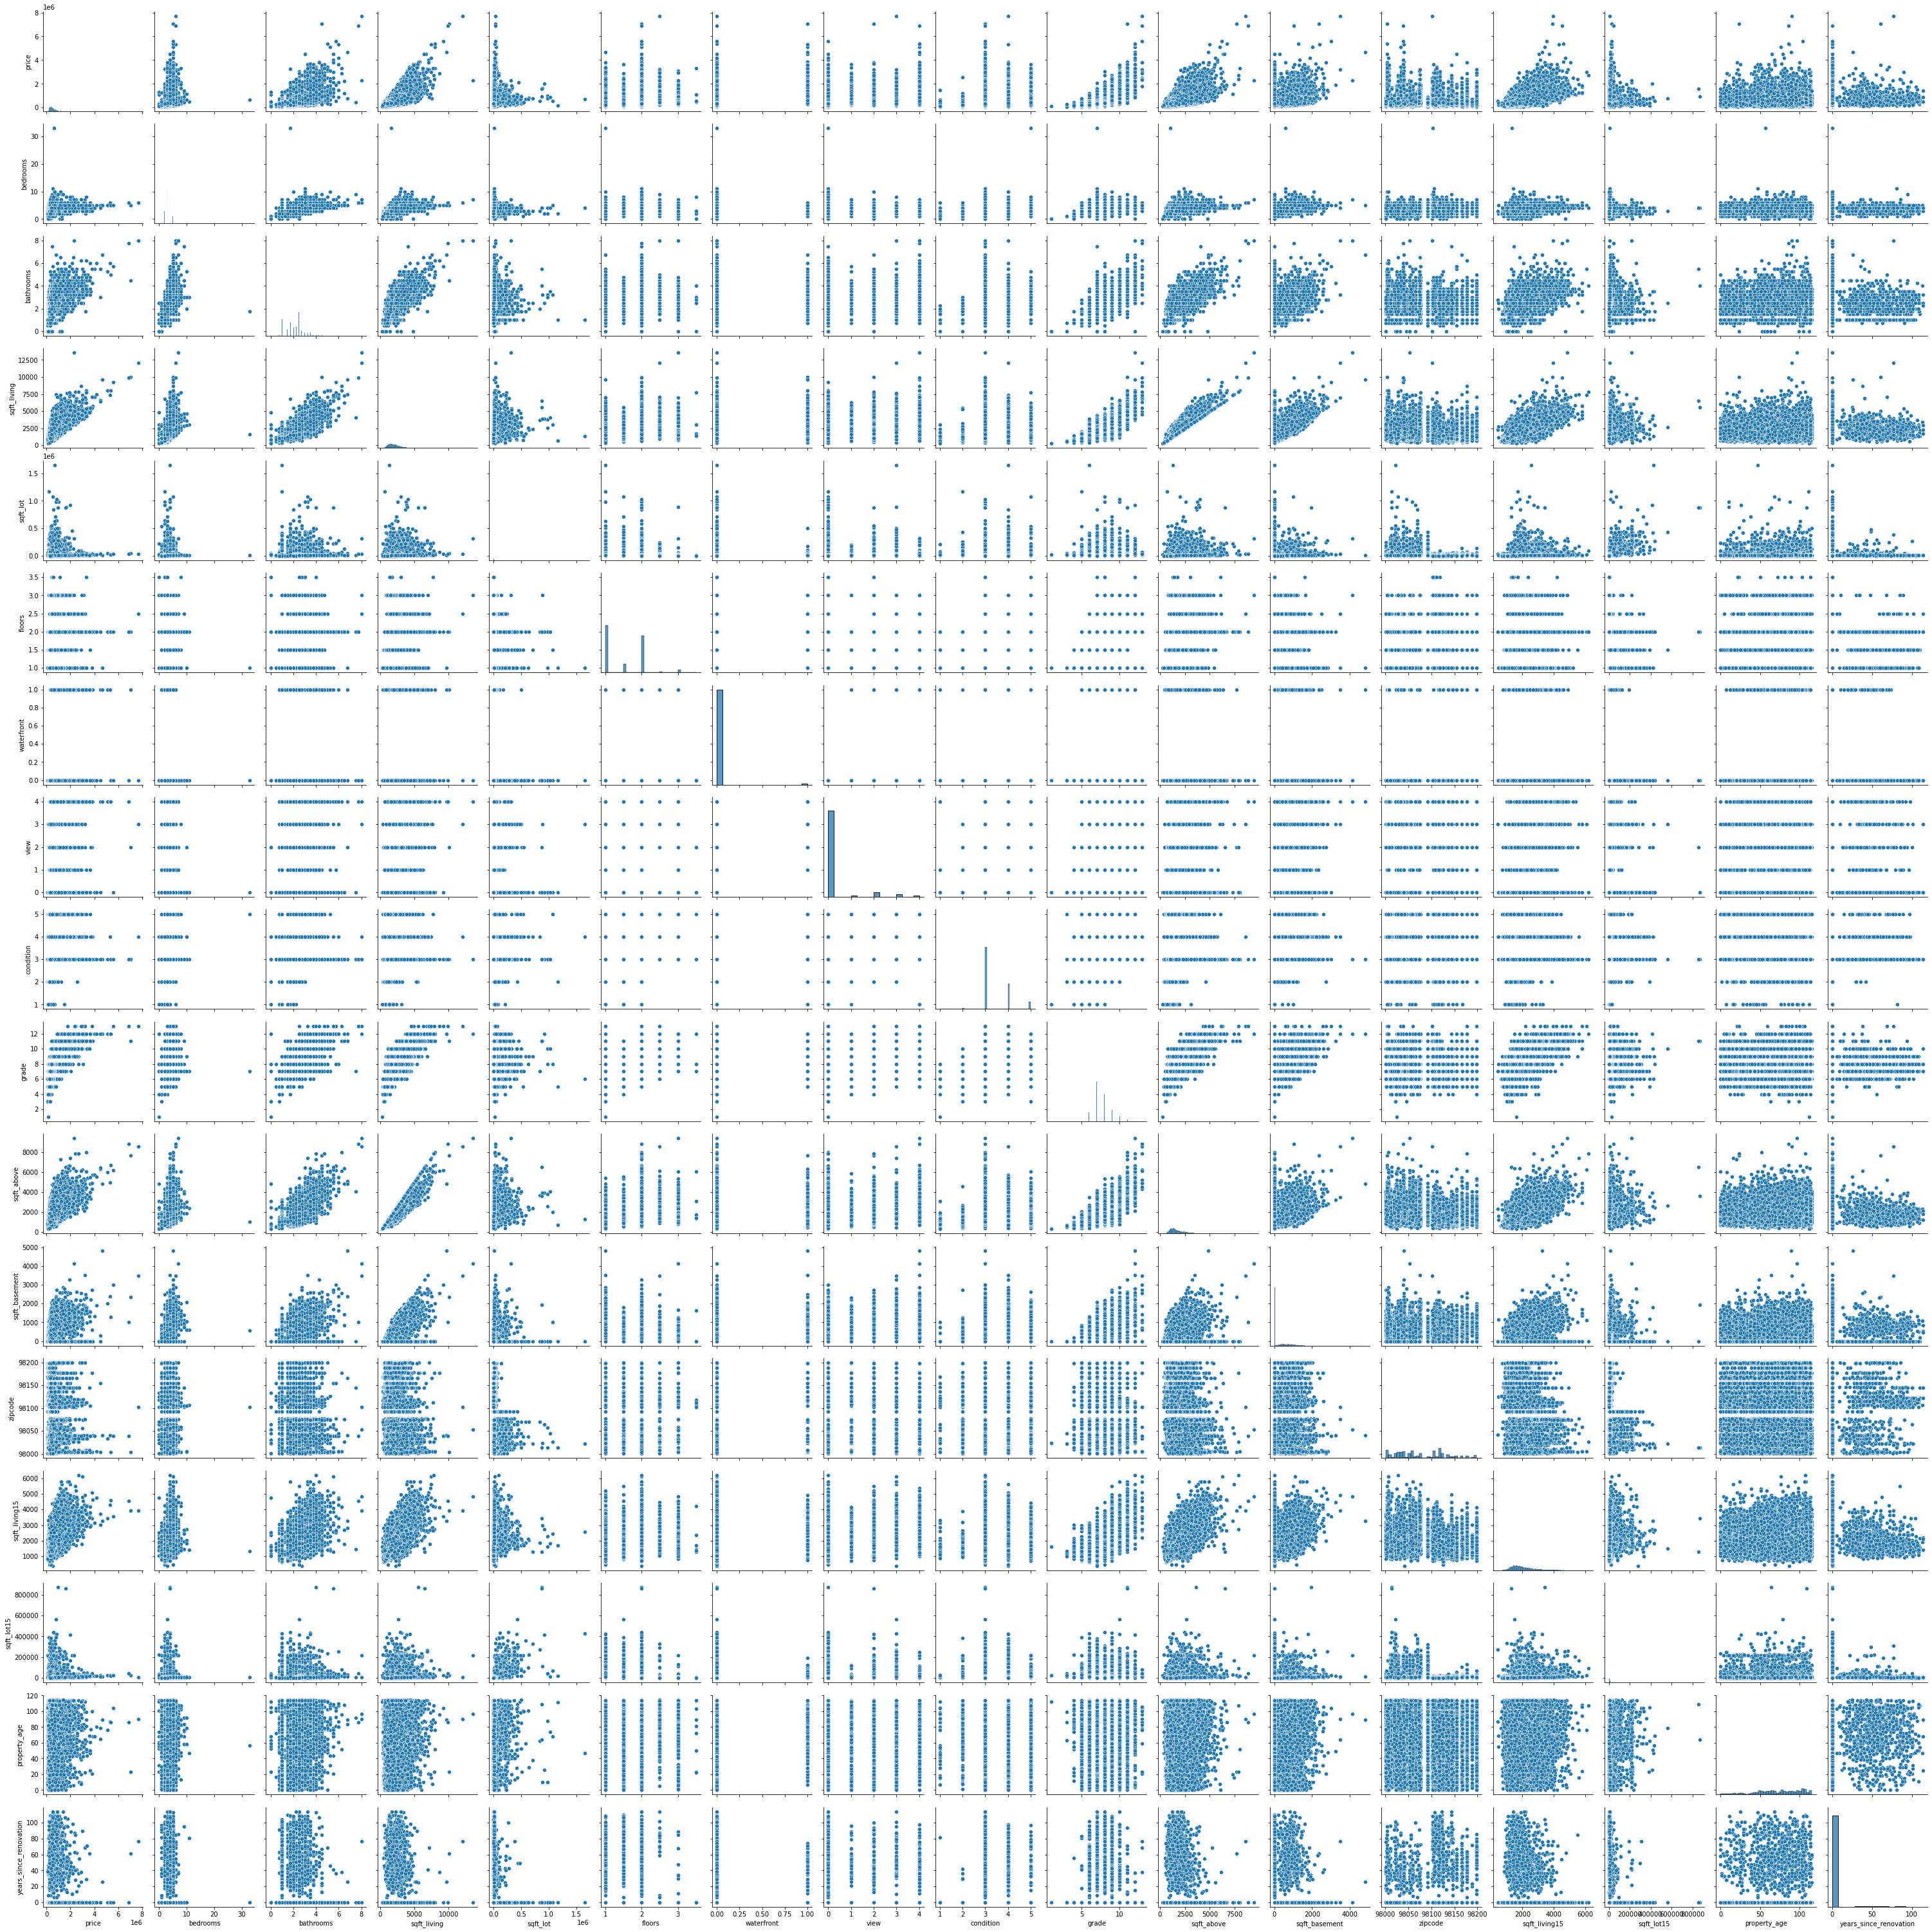

In [138]:
# we plot a pairplot to show the paired correlation of our variables 

sns.pairplot(data = home)

plt.show()

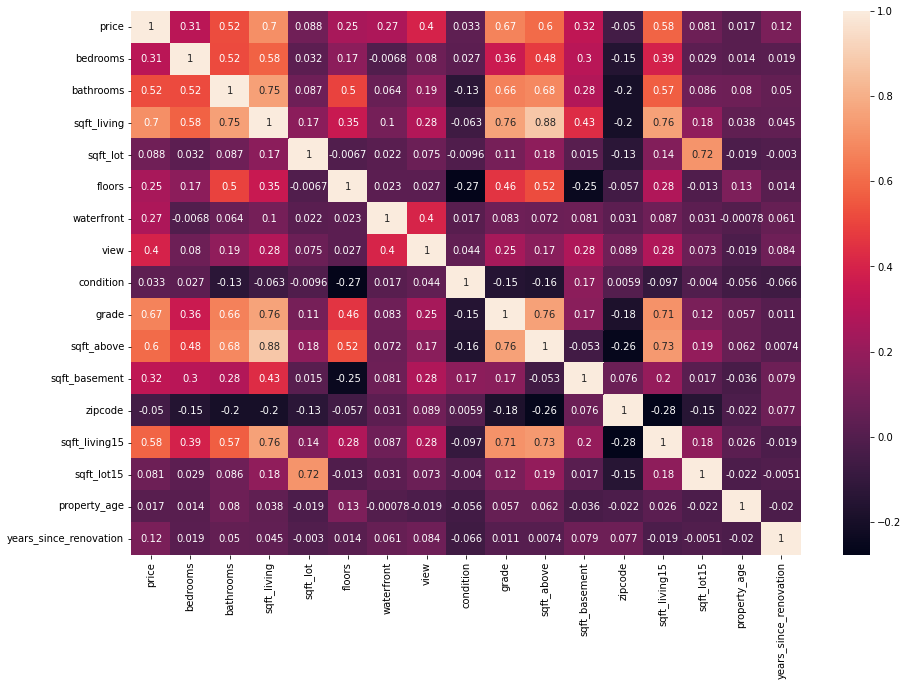

In [139]:
# To see how the variables correlate with each other
# We plot a correlation matrix heatmap 
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(home.corr(),annot=True)
# showing
plt.show()

The variables that are highly correlated are sqft above and the sqft living room, which is 0.88 . This mean that the number of square feet of the house above the ground is highly correlated to the size of the living room

The variables that are negatively weakely correlated are the availability of a waterfront and the age of the property which is -0.00078. 

The price of the properties is positively highly  corellated to the size of the living room ; 0.7, (0.58 in 2015), the grade of the house; 0.67 , the sqft above; 0.6 and the number of bathrooms; 0.52.

The price of the property is moderately corellated to most of the variables like the number of bedrooms; 0.31.

The price of the property is weakely corellated to the age of the propeties; 0.017.


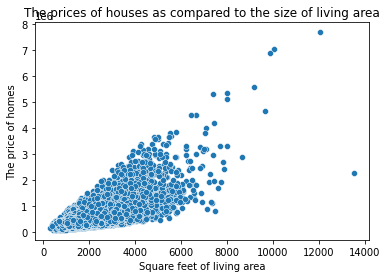

In [140]:
# plot a scatter plot to show how house price correlates to the size of the living room

sns.scatterplot(x = home['sqft_living'], y = home['price'], data=home)
plt.xlabel('Square feet of living area')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the size of living area')
plt.show()

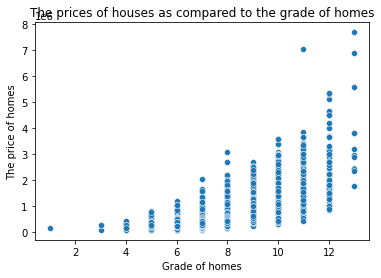

In [141]:
# plot scatterplots to show how house price correlates to the grade of homes

sns.scatterplot(x = home['grade'], y = home['price'], data=home)
plt.xlabel('Grade of homes')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the grade of homes')
plt.show()

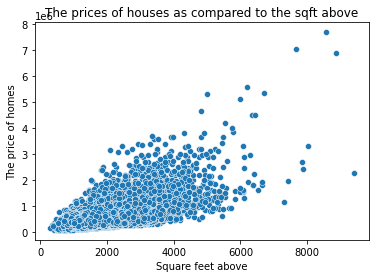

In [142]:
# plot scatter plot to show how house price correlates to the sqft above

sns.scatterplot(x = home['sqft_above'], y = home['price'], data=home)
plt.xlabel('Square feet above')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the sqft above')
plt.show()


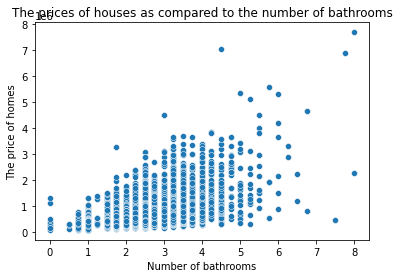

In [143]:
# plot bargraphs to show how house price correlates to the bathrooms

#Creating the dataframe with the sum of prices.
bathrooms = home.groupby('price').sum()
bathrooms = bathrooms.reset_index(inplace=True)

#Plotting the graphs using the seaborn barplot
sns.scatterplot(x = home['bathrooms'], y = home['price'], data=bathrooms)
plt.xlabel('Number of bathrooms')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the number of bathrooms')
plt.show()

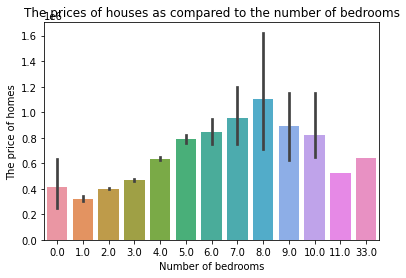

In [144]:
# plot bargraphs to show how house price correlates to the bedrooms

#Creating the dataframe with the sum of prices.
bedrooms = home.groupby('price').sum()
bedrooms = bedrooms.reset_index(inplace=True)

#Plotting the graphs using the seaborn barplot
sns.barplot(x = home['bedrooms'], y = home['price'], data=bedrooms)
plt.xlabel('Number of bedrooms')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the number of bedrooms')
plt.show()

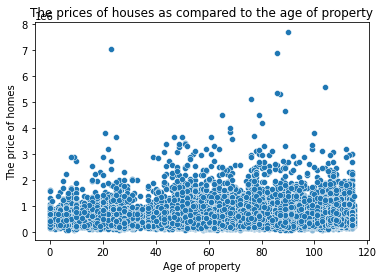

In [145]:
# plot scatterplot to show how house price correlates to the age of property

sns.scatterplot(x = home['property_age'], y = home['price'], data=home)
plt.xlabel('Age of property')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the age of property')
plt.show()

# It is evident that there is no correlation between the age of the property and the price

In [146]:
home.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'property_age', 'years_since_renovation'],
      dtype='object')

# Regression Techniques

In [147]:
# first, we create a copy of our dataset

homdataset = home.copy()

In [148]:
# preview our copy
homdataset.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0       3.0       1.00       1180.0    5650.0     1.0         0.0   
1  538000.0       3.0       2.25       2570.0    7242.0     2.0         0.0   
2  180000.0       2.0       1.00        770.0   10000.0     1.0         0.0   
3  604000.0       4.0       3.00       1960.0    5000.0     1.0         0.0   
4  510000.0       3.0       2.00       1680.0    8080.0     1.0         0.0   

   view  condition  grade  sqft_above  sqft_basement  zipcode  sqft_living15  \
0   0.0        3.0    7.0      1180.0            0.0  98178.0         1340.0   
1   0.0        3.0    7.0      2170.0          400.0  98125.0         1690.0   
2   0.0        3.0    6.0       770.0            0.0  98028.0         2720.0   
3   0.0        5.0    7.0      1050.0          910.0  98136.0         1360.0   
4   0.0        3.0    8.0      1680.0            0.0  98074.0         1800.0   

   sqft_lot15  property_age  years_since_renovation  
0      5650.0          55.0                     0.0  
1      7639.0          51.0                    40.0  
2      8062.0          33.0                     0.0  
3      5000.0          65.0                     0.0  
4      7503.0          87.0                     0.0

### Feature Scaling

In [149]:
from sklearn import preprocessing


NORMALIZATION

In [150]:
# normalization
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))

#x_after_min_max_scaler = min_max_scaler.fit_transform(x)

# standard scaling
Standardisation = preprocessing.StandardScaler()

#x_after_Standardisation = Standardisation.fit_transform(x)


In [151]:
# Performing Normalization
norm = min_max_scaler.fit_transform(homdataset)


In [152]:
# previewing the values of x after normalization
print(norm)

[[0.01926557 0.09090909 0.125      ... 0.00574235 0.47826087 0.        ]
 [0.06072131 0.09090909 0.28125    ... 0.00802712 0.44347826 0.35087719]
 [0.01377049 0.06060606 0.125      ... 0.00851302 0.28695652 0.        ]
 ...
 [0.04289849 0.06060606 0.09375    ... 0.00155764        nan 0.        ]
 [0.04262295 0.09090909 0.3125     ... 0.00073057        nan        nan]
 [0.03278689 0.06060606 0.09375    ... 0.00081098        nan        nan]]


In [153]:
# converting the normalized set into a datadframe
norm_df = pd.DataFrame(norm)

In [154]:
# previewing
norm_df.head()

0         1        2         3         4    5    6    7    8   \
0  0.019266  0.090909  0.12500  0.067170  0.003108  0.0  0.0  0.0  0.5   
1  0.060721  0.090909  0.28125  0.172075  0.004072  0.4  0.0  0.0  0.5   
2  0.013770  0.060606  0.12500  0.036226  0.005743  0.0  0.0  0.0  0.5   
3  0.069377  0.121212  0.37500  0.126038  0.002714  0.0  0.0  0.0  1.0   
4  0.057049  0.090909  0.25000  0.104906  0.004579  0.0  0.0  0.0  0.5   

         9         10        11        12        13        14        15  \
0  0.500000  0.097588  0.000000  0.893939  0.161934  0.005742  0.478261   
1  0.500000  0.206140  0.082988  0.626263  0.222165  0.008027  0.443478   
2  0.416667  0.052632  0.000000  0.136364  0.399415  0.008513  0.286957   
3  0.500000  0.083333  0.188797  0.681818  0.165376  0.004996  0.565217   
4  0.583333  0.152412  0.000000  0.368687  0.241094  0.007871  0.756522   

         16  
0  0.000000  
1  0.350877  
2  0.000000  
3  0.000000  
4  0.000000

In [155]:
# checking the shape
norm_df.shape

(21613, 17)

In [156]:
# checking for null values
norm_df.isnull().sum()
# there are 353 null values in every column

0     353
1     353
2     353
3     353
4     353
5     353
6     353
7     353
8     353
9     353
10    353
11    353
12    353
13    353
14    353
15    353
16    353
dtype: int64

In [157]:
# checking the values
print(norm_df.value_counts())

0         1         2        3         4         5    6    7     8     9         10        11        12        13        14        15        16      
0.000000  0.030303  0.00000  0.028679  0.025961  0.0  0.0  0.00  0.50  0.166667  0.041667  0.000000  0.106061  0.130959  0.048511  0.547826  0.000000    1
0.064262  0.121212  0.31250  0.150189  0.002473  0.4  0.0  0.00  0.50  0.583333  0.218202  0.000000  0.373737  0.323696  0.004069  0.921739  0.000000    1
          0.151515  0.37500  0.171321  0.007245  0.0  0.0  0.00  0.50  0.583333  0.142544  0.201245  0.777778  0.361556  0.019124  0.382609  0.000000    1
                    0.31250  0.304151  0.064596  0.0  0.0  0.00  0.75  0.583333  0.205044  0.448133  0.186869  0.358114  0.122343  0.895652  0.000000    1
                             0.178113  0.006624  0.0  0.0  0.00  0.50  0.500000  0.121711  0.259336  0.035354  0.268628  0.010601  0.739130  0.000000    1
                                                                           

STANDARDIZATION

In [158]:
# performing standadization
stand = Standardisation.fit_transform(homdataset)

In [159]:
# previewing values of x after standardization
print(stand)

[[-0.87007076 -0.40105433 -1.45511576 ... -0.26063263 -0.55083281
  -0.19338198]
 [-0.0113644  -0.40105433  0.16899627 ... -0.18816434 -0.68690571
   3.02573946]
 [-0.98389485 -1.47830198 -1.45511576 ... -0.17275253 -1.29923375
  -0.19338198]
 ...
 [-0.38054294 -1.47830198 -1.77993816 ... -0.39336365         nan
  -0.19338198]
 [-0.38625044 -0.40105433  0.49381867 ... -0.41959651         nan
          nan]
 [-0.58999285 -1.47830198 -1.77993816 ... -0.41704609         nan
          nan]]


In [160]:
# setting column names
col_names = list(homdataset.columns.values)

# converting into a dataframe
stand_df = pd.DataFrame(stand, columns=col_names)

In [161]:
# preview
stand_df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
0 -0.870071 -0.401054  -1.455116    -0.984424 -0.228401 -0.921080   -0.087899   
1 -0.011364 -0.401054   0.168996     0.526713 -0.190184  0.928125   -0.087899   
2 -0.983895 -1.478302  -1.455116    -1.430155 -0.123975 -0.921080   -0.087899   
3  0.167929  0.676193   1.143463    -0.136448 -0.244005 -0.921080   -0.087899   
4 -0.087428 -0.401054  -0.155826    -0.440849 -0.170067 -0.921080   -0.087899   

       view  condition     grade  sqft_above  sqft_basement   zipcode  \
0 -0.307271  -0.632987 -0.568201   -0.739254      -0.659111  1.875439   
1 -0.307271  -0.632987 -0.568201    0.453598       0.243873  0.883562   
2 -0.307271  -0.632987 -1.420644   -1.233264      -0.659111 -0.931760   
3 -0.307271   2.445078 -0.568201   -0.895891       1.395177  1.089423   
4 -0.307271  -0.632987  0.284241   -0.136804      -0.659111 -0.070886   

   sqft_living15  sqft_lot15  property_age  years_since_renovation  
0      -0.947607   -0.260633     -0.550833               -0.193382  
1      -0.437406   -0.188164     -0.686906                3.025739  
2       1.064043   -0.172753     -1.299234               -0.193382  
3      -0.918453   -0.284315     -0.210651               -0.193382  
4      -0.277057   -0.193119      0.537750               -0.193382

In [162]:
# checking the shape
stand_df.shape

(21613, 17)

In [163]:
# checking for null values
stand_df.isnull().sum()

price                     353
bedrooms                  353
bathrooms                 353
sqft_living               353
sqft_lot                  353
floors                    353
waterfront                353
view                      353
condition                 353
grade                     353
sqft_above                353
sqft_basement             353
zipcode                   353
sqft_living15             353
sqft_lot15                353
property_age              353
years_since_renovation    353
dtype: int64

ROBUST SCALER

In [164]:
# Robust scaling
trans = RobustScaler()
rob = trans.fit_transform(homdataset)


In [165]:
# previewing values of x after robust scaling
print(rob)

[[-7.11711712e-01  0.00000000e+00 -1.66666667e+00 ... -3.94769801e-01
  -4.44444444e-01  0.00000000e+00]
 [ 2.70270270e-01  0.00000000e+00  0.00000000e+00 ...  3.80742448e-03
  -5.33333333e-01  4.00000000e+01]
 [-8.41876359e-01 -1.00000000e+00 -1.66666667e+00 ...  8.85727168e-02
  -9.33333333e-01  0.00000000e+00]
 ...
 [-1.51907425e-01 -1.00000000e+00 -2.00000000e+00 ... -1.12479335e+00
              nan  0.00000000e+00]
 [-1.58434296e-01  0.00000000e+00  3.33333333e-01 ... -1.26907470e+00
              nan             nan]
 [-3.91425909e-01 -1.00000000e+00 -2.00000000e+00 ... -1.25504734e+00
              nan             nan]]


In [166]:
# setting column names 
col_names = list(homdataset.columns.values)

# converting into a dataframe
rob_df = pd.DataFrame(rob, columns=col_names)

In [167]:
# preview
rob_df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0 -0.711712       0.0  -1.666667    -0.659978 -0.345537    -0.5         0.0   
1  0.270270       0.0   0.000000     0.579710 -0.064302     0.5         0.0   
2 -0.841876      -1.0  -1.666667    -1.025641  0.422912    -0.5         0.0   
3  0.475303       1.0   1.000000     0.035674 -0.460363    -0.5         0.0   
4  0.183287       0.0  -0.333333    -0.214047  0.083734    -0.5         0.0   

   view  condition  grade  sqft_above  sqft_basement   zipcode  sqft_living15  \
0   0.0        0.0    0.0   -0.382353       0.000000  1.345238      -0.568182   
1   0.0        0.0    0.0    0.588235       0.714286  0.714286      -0.170455   
2   0.0        0.0   -1.0   -0.784314       0.000000 -0.440476       1.000000   
3   0.0        2.0    0.0   -0.509804       1.625000  0.845238      -0.545455   
4   0.0        0.0    1.0    0.107843       0.000000  0.107143      -0.045455   

   sqft_lot15  property_age  years_since_renovation  
0   -0.394770     -0.444444                     0.0  
1    0.003807     -0.533333                    40.0  
2    0.088573     -0.933333                     0.0  
3   -0.525024     -0.222222                     0.0  
4   -0.023446      0.266667                     0.0

In [168]:
# checking the shape
rob_df.shape

(21613, 17)

In [169]:
# checking for null values
rob_df.isnull().sum()

price                     353
bedrooms                  353
bathrooms                 353
sqft_living               353
sqft_lot                  353
floors                    353
waterfront                353
view                      353
condition                 353
grade                     353
sqft_above                353
sqft_basement             353
zipcode                   353
sqft_living15             353
sqft_lot15                353
property_age              353
years_since_renovation    353
dtype: int64

All the scaling techniques; normalization, standardization and robust scaling give us very many null values (353).

However, the normalization and standardization give us NAN values. Therefore, I will use the robust scaler.

In [170]:
# dropping null values
rob_drop = rob_df.dropna()

In [171]:
# checking for missing values after dropping
rob_drop.isnull().sum()
# there are nomissing values

price                     0
bedrooms                  0
bathrooms                 0
sqft_living               0
sqft_lot                  0
floors                    0
waterfront                0
view                      0
condition                 0
grade                     0
sqft_above                0
sqft_basement             0
zipcode                   0
sqft_living15             0
sqft_lot15                0
property_age              0
years_since_renovation    0
dtype: int64

In [172]:
# checking shape after dropping to see how much data was lost
rob_drop.shape

(20909, 17)

In [173]:
# calculating how many recrds were lost
lost = 21613-20909
print(lost)

# 704 records were lost

# percentage of data lost
percentage_lost = round((704/21613)*100) 
print(percentage_lost)

# this is not a huge loss, therefore we procceed with the dropping of null values

704
3


## Multilinear Regression

#### Multicollinearity

In [174]:
# finding multicollinearity of the independent variables
# we drop the dependent variable, 'price'

multicorr = homdataset.drop('price' , 1)

In [175]:
# previewing
multicorr.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0       3.0       1.00       1180.0    5650.0     1.0         0.0   0.0   
1       3.0       2.25       2570.0    7242.0     2.0         0.0   0.0   
2       2.0       1.00        770.0   10000.0     1.0         0.0   0.0   
3       4.0       3.00       1960.0    5000.0     1.0         0.0   0.0   
4       3.0       2.00       1680.0    8080.0     1.0         0.0   0.0   

   condition  grade  sqft_above  sqft_basement  zipcode  sqft_living15  \
0        3.0    7.0      1180.0            0.0  98178.0         1340.0   
1        3.0    7.0      2170.0          400.0  98125.0         1690.0   
2        3.0    6.0       770.0            0.0  98028.0         2720.0   
3        5.0    7.0      1050.0          910.0  98136.0         1360.0   
4        3.0    8.0      1680.0            0.0  98074.0         1800.0   

   sqft_lot15  property_age  years_since_renovation  
0      5650.0          55.0                     0.0  
1      7639.0          51.0                    40.0  
2      8062.0          33.0                     0.0  
3      5000.0          65.0                     0.0  
4      7503.0          87.0                     0.0

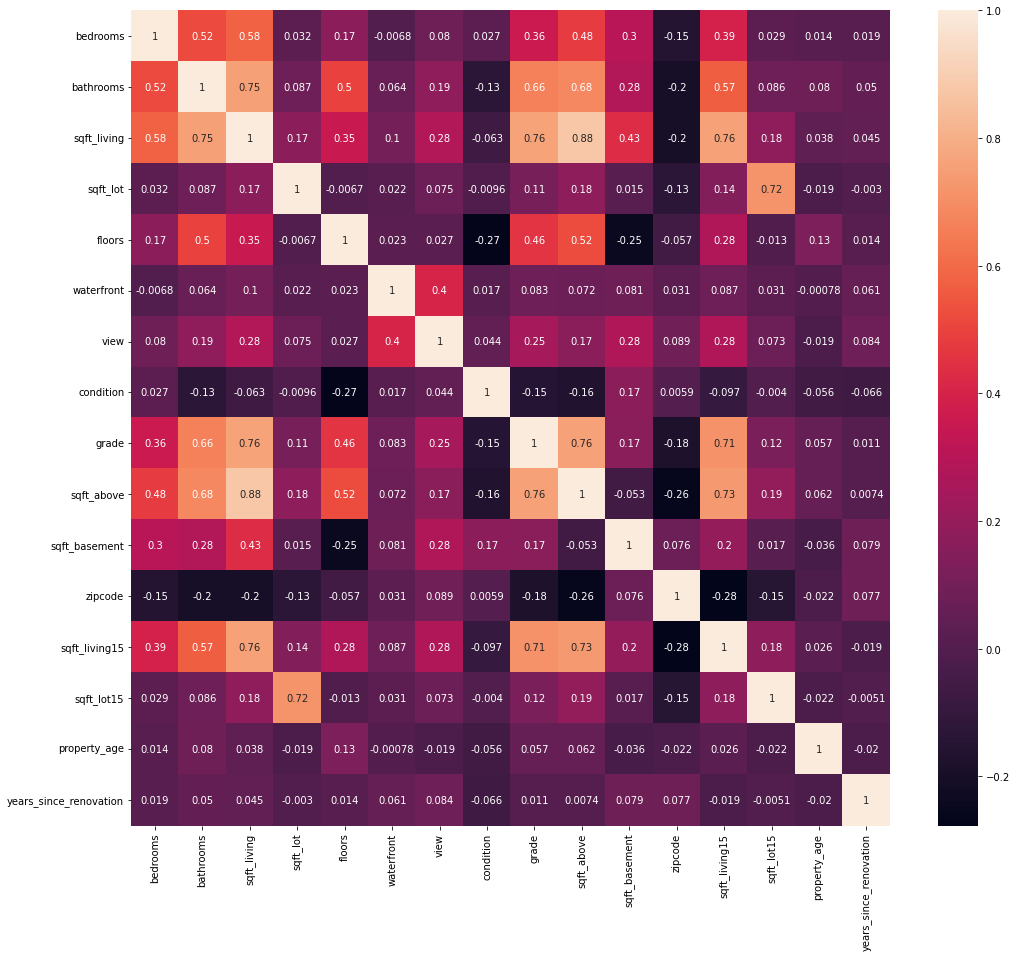

In [176]:
# correlation matrix
# plotting a correlation heatmap
plt.figure(figsize=(17,15))

sns.heatmap(multicorr.corr(), annot = True)

plt.show()

### Testing Multicollinearity using the VIF Score

In [177]:
# First, we perform a train test split on our scaled dataframe
# Preparing the Data 

# Splitting our features into train and test sets
X = rob_drop.drop(['price'], 1)
y = rob_drop['price']


In [178]:
# Dividing our data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [179]:
# training our algorithm
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [180]:
# checking the coefficients 
coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])


In [181]:
# previewing
coeff

Coefficient
bedrooms                  -0.099839
bathrooms                 -0.017672
sqft_living                0.332330
sqft_lot                   0.000533
floors                    -0.025302
waterfront                 1.712674
view                       0.150234
condition                  0.192279
grade                      0.315860
sqft_above                 0.268410
sqft_basement              0.176512
zipcode                    0.121651
sqft_living15              0.076484
sqft_lot15                -0.011391
property_age              -0.014384
years_since_renovation     0.007580

In [182]:
# Next, we make our predictions
y_pred = regressor.predict(X_test)


In [183]:
# We then compare the actual values for X_test with the predicted values

preddf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [184]:
# previewing
preddf

Actual  Predicted
13074 -0.453557   0.395263
6998   0.229885  -0.522643
5152  -0.046598   0.129851
819   -0.635290  -0.504953
13652  0.027959  -0.678449
...         ...        ...
759   -0.141038   0.700516
4766   0.121156   0.158295
4205   0.307549   0.681061
20227 -0.220565   0.005298
10551  0.183287  -0.079448

[4182 rows x 2 columns]

In [185]:
# Calculating  the Algorithm errors
from sklearn import metrics
print('Mean Squared Error is:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error is:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average'))

Mean Squared Error is: 0.4758236263777103
Mean Absolute Error is: 0.44903580319503084
Root Mean Squared Error: 0.6897997001867356
R2 Score: 0.625047104510196


In [186]:
# we test for multicollinearity using the VIF score
# calculating VIF score

from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                   feature        VIF
0                 bedrooms   1.640390
1                bathrooms   2.965317
2              sqft_living  23.380517
3                 sqft_lot   2.071554
4                   floors   1.920093
5               waterfront   1.203768
6                     view   1.412302
7                condition   1.114013
8                    grade   3.152785
9               sqft_above  21.237017
10           sqft_basement   6.957982
11                 zipcode   1.181431
12           sqft_living15   2.899536
13              sqft_lot15   2.099648
14            property_age   1.020264
15  years_since_renovation   1.030339


**VIF interpretation**

VIF score of 1 indicates that the independent variables are not correlated.

VIF score between 1 and 5 indicates that variables are moderately correlated.

VIF score greater than 5 indicate variables are highly correlated.

From our analysis, sqft_living, sqft_above and sqft_basement have high are highly correlated with VIF scores of 23.3805, 21.237 and 6.9579 respectively.


#### Residual Plots

In [187]:
# Create the residual by substracting the test value from the predicted 

residuals = np.subtract(y_pred, y_test)

# printing the mean
print('residuals mean:', residuals.mean())

print('____________________________________________________')
# Describing our residual:
print(pd.DataFrame(residuals).describe())


residuals mean: 0.009079305495978667
____________________________________________________
             price
count  4182.000000
mean      0.009079
std       0.689822
min     -10.172863
25%      -0.277994
50%       0.056757
75%       0.380877
max       2.686256


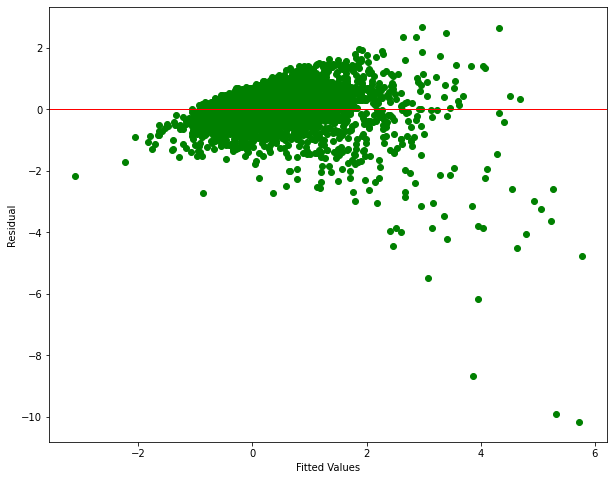

In [188]:
# plotting the residuals plot
fig, ax = plt.subplots(figsize=(10,8))

plt.scatter(y_pred, residuals, color='green')
plt.ylabel('Residual')
plt.xlabel('Fitted Values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

#### Heteroskedasticity

In [190]:
# testing for heteroskedasticity using barlett's test

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

#computing a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(test_result)


if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous, no heteroskedasticity')

# If the test_result is greater than the critical value, then we reject our null
# hypothesis (Ho: There is no pattern in the variance of the data). 
# Meaning there are patterns to the variance of the data

# Otherwise,when there are no patterns, and we fail to reject the null hypothesis.
# Meaning the variance is homogeneous across our data

232.61390319162226
The variances are homogeneous, no heteroskedasticity


### Quantile Regression

In [191]:
# Splitting our dataset into test and train splits
X = rob_drop.drop(['price'],1).index.values.reshape(-1, 1)
y = rob_drop['price'].values.reshape(-1, 1)


Text(0.5, 1.0, 'Data with non-constant variance')

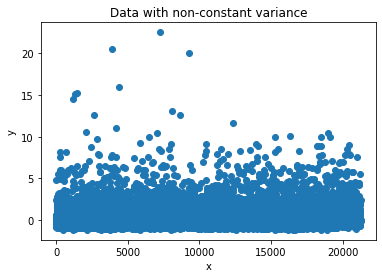

In [192]:
# plotting
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data with non-constant variance")

In [194]:
# checking columns
rob_drop.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'property_age', 'years_since_renovation'],
      dtype='object')

In [193]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile

mod = smf.quantreg('y ~ X', rob_drop)
res = mod.fit(q=.5)

# Then print out the summary of our model

print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:            0.0002516
Model:                       QuantReg   Bandwidth:                      0.1323
Method:                 Least Squares   Sparsity:                        1.780
Date:                Mon, 25 Apr 2022   No. Observations:                20909
Time:                        07:40:03   Df Residuals:                    20907
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0282      0.012     -2.295      0.022      -0.052      -0.004
X           2.895e-06      1e-06      2.890      0.004    9.31e-07    4.86e-06

The condition number is large, 2.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.


The value of R squared is low, indicating our model is okay.

In [195]:
# Finding the regression coefficients for the conditioned median, from 0.1 to 0.9 quantile
# (start, stop, increment)
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# Build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['X']] + res.conf_int().loc['X'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1  -0.668652  0.000003    2.057410e-06        0.000004
1  0.2  -0.520807  0.000004    2.599516e-06        0.000005
2  0.3  -0.366739  0.000004    2.310061e-06        0.000005
3  0.4  -0.198676  0.000003    1.552899e-06        0.000005
4  0.5  -0.028244  0.000003    9.313469e-07        0.000005
5  0.6   0.170418  0.000004    1.443739e-06        0.000006
6  0.7   0.407645  0.000004    9.215915e-07        0.000007
7  0.8   0.742436  0.000004    6.833527e-07        0.000008
8  0.9   1.275722  0.000007    1.366292e-06        0.000013


From our quantile regression, we can see that the factors affecting home prices in the lower quantile home prices are different from those in the higher quantile price ranges.

### Lasso Regression

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [208]:
import multiprocessing as mp
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [196]:
# using the train and test subsets created earlier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))} 


lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 


In [198]:
# Fitting models and print the best parameters, R-squared scores and MSE

gridlasso.fit(X_train, y_train) 

# Previewing

print("Best Lasso Parameters is :", gridlasso.best_params_)
print("____________________________________________") 
print("R2 score Lasso is :", gridlasso.score(X_test, y_test))
print("____________________________________________") 
print("MSE Lasso is :", mean_squared_error(y_test, gridlasso.predict(X_test)))


Best Lasso Parameters is : {'alpha': 7.0}
____________________________________________
R2 score Lasso is : 0.0006631512363181047
____________________________________________
MSE Lasso is : 1.1881275999046366


In [205]:
# calculating and displaying the coefficients
# initialize a new dataframe to show the coefficients
coeff= pd.DataFrame(homdataset.columns) 

In [224]:
# we create a new column with the estimates
#coeff['Coefficient Estimate'] = Series(gridlasso.best_estimator_.coef_)


### Ridge Regression

In [215]:
# assigning ridge regression parameters
ridge = linear_model.Ridge() 
gridridge = GridSearchCV(ridge, parameters, scoring ='r2', cv=10) 


In [216]:
# using the train and test sets created earlier
# Fitting models and print the best parameters, R-squared scores and MSE

gridridge.fit(X_train, y_train) 
print("ridge best parameters:", gridridge.best_params_) 
print("ridge R2 score:", gridridge.score(X_test, y_test))
print("ridge MSE:", mean_squared_error(y_test, gridridge.predict(X_test)))


ridge best parameters: {'alpha': 24.0}
ridge R2 score: 0.0006732470818469061
ridge MSE: 1.1881155967920405


In [220]:
# calculating and displaying the coefficients

coeff = pd.DataFrame(homdataset.columns) 


In [222]:
# we create a new column with the estimates
# coeff['Coefficient Estimate'] = Series(gridridge.best_estimator_.coef_)


### Elastic Net Regression

In [226]:
# improting elastic net library
from sklearn.linear_model import ElasticNet


In [227]:
#from sklearn.linear_model import ElasticNet

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid=
                    {'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]}
                    ,scoring='r2',n_jobs=1,refit=True,cv=10)


In [229]:
# fittin the model 
search.fit(X,y)

GridSearchCV(cv=10, estimator=ElasticNet(normalize=True), n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             scoring='r2')

In [228]:
# displaying the best parameters and the best results we can get with that setup.

print(search.best_params_)
abs(search.best_score_)

{'alpha': 0.0001, 'l1_ratio': 0.2}


0.0019365048427486987

In [ ]:
{'alpha': 1e-05, 'l1_ratio': 0.8}
0.648829960384261

In [231]:
# Using our best parameters from the cell above to fit the model

alpha = 0.0001 
l1_ratio = 0.2

# fitting
elastic=ElasticNet(normalize=True,alpha=0.0001,l1_ratio=0.2)
elastic.fit(X,y)
elastic_net_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(elastic_net_model)

1.300465130371461


## Recommendation

The best regression moodel for this data is quantile regression.

The company could consider introducing other independent variables like monthly income, which would most likely have an impact on the purchases of the properties. 

It was observed that a property with a higher number of bedrooms is most likely to cost a higher price, hence the company could evaluate costs of constructing houses with more bathrooms as this would sell at higher prices. 

The quantile model created gives predictor variables that the company should focus on.